# FITS Metadata Extractor Test Notebook

This notebook demonstrates how to use the `fits_metadata_extractor` package to process, visualize, and search metadata from FITS files.

## Table of Contents

1. [Introduction](#1.-Introduction)
2. [Setup](#2.-Setup)
3. [Processing FITS Files](#3.-Processing-FITS-Files)
4. [Saving and Loading Metadata](#4.-Saving-and-Loading-Metadata)
5. [Plotting MOCs and Polygons](#5.-Plotting-MOCs-and-Polygons)
6. [Searching FITS Files](#6.-Searching-FITS-Files)
    - [Search by Point](#Search-by-Point)
    - [Search by Circular Region](#Search-by-Circular-Region)
    - [Search by Polygonal Region](#Search-by-Polygonal-Region)
7. [Plotting Search Results](#7.-Plotting-Search-Results)
8. [Conclusion](#8.-Conclusion)

## 1. Introduction

The `fits_metadata_extractor` package provides tools to process FITS files, extract metadata, visualize coverage maps, and search for FITS files based on spatial queries.

In this notebook, we'll:

- Process a directory of FITS files.
- Save and load the extracted metadata.
- Plot Multi-Order Coverage maps (MOCs) and polygons.
- Perform spatial searches on the metadata.
- Visualize the search results.

## 2. Setup

First, we need to import the necessary modules and set up logging.

In [21]:
import os

# Import classes and functions from the fits_metadata_extractor package
from fits_metadata_extractor.processor import FITSProcessor
from fits_metadata_extractor.utils import save_metadata_to_csv, load_metadata_from_csv
from fits_metadata_extractor.search import search_fits_by_point, search_fits_by_region
from fits_metadata_extractor.plotter import plot_moc_and_polygon_from_dataset_notebook, plot_search_region_and_find_fits
from fits_metadata_extractor.logger import setup_logging

# Initialize and configure logging
logger = setup_logging()

## 3. Processing FITS Files

Define the directory containing the FITS files and process them using `FITSProcessor`.

In [3]:
# Define the directory containing FITS files
fits_directory = "fits_collection"  # <-- CHANGE THIS PATH TO YOUR TEST FITS FILES DIRECTORY

# Define the output CSV file path
output_csv = 'test_metadata.csv'

# Define the directory to save plots
plot_output_dir = 'test_plots'

if not os.path.isdir(fits_directory):
    logger.error(f"The specified FITS directory does not exist: {fits_directory}")
else:
    logger.info(f"FITS directory found: {fits_directory}")


2024-11-28 14:45:09,103 - INFO - FITS directory found: fits_collection


In [4]:
# Instantiate FITSProcessor with desired number of workers
processor = FITSProcessor(max_workers=5)

# Process the FITS directory
metadata_df = processor.process_fits_directory_parallel(fits_directory)


2024-11-28 14:45:09,108 - INFO - Processing file: fits_collection/G327.617-0.364_I4.fits
2024-11-28 14:45:09,109 - INFO - Processing file: fits_collection/SN1987A_cut_35_smHB.fits
2024-11-28 14:45:09,109 - INFO - Processing file: fits_collection/G351.702+0.672_atlasgal.fits
2024-11-28 14:45:09,109 - INFO - Processing file: fits_collection/5GHz_n_f.fits
2024-11-28 14:45:09,109 - INFO - Processing file: fits_collection/G351.632-0.459_atlasgal.fits
2024-11-28 14:45:09,111 - INFO - Inferred object name 'G327.617-0.364' for file 'fits_collection/G327.617-0.364_I4.fits'.
2024-11-28 14:45:09,112 - INFO - Inferred object name 'G351.702' for file 'fits_collection/G351.702+0.672_atlasgal.fits'.
2024-11-28 14:45:09,116 - INFO - Inferred object name 'G351.632-0.459' for file 'fits_collection/G351.632-0.459_atlasgal.fits'.
2024-11-28 14:45:09,138 - ERROR - Unexpected error during NED query for 'G351.702': The remote service returned the following error message.
ERROR: The object name that you have 

## 4. Saving and Loading Metadata

Save the extracted metadata to a CSV file for future use.

In [5]:
# Show metadata_df content 

logger.info(f"Metadata DataFrame describe: {metadata_df.head()}")


2024-11-28 14:45:10,799 - INFO - Metadata DataFrame describe:                       FITS_File  \
0  G351.632-0.459_atlasgal.fits   
1      SN1987A_cut_35_smHB.fits   
2        G327.617-0.364_I4.fits   
3             SNaverage5-0.fits   
4  G351.702+0.672_atlasgal.fits   

                                             Polygon  \
0  POLYGON ((351.7458316825 -0.5191667704999999, ...   
1  POLYGON ((83.98078838261291 -69.31003927205, 8...   
2  POLYGON ((327.7141602095 -0.4191667505, 327.51...   
3  POLYGON ((83.96216077193111 -69.30305555555553...   
4  POLYGON ((351.8408317015 0.6008334535, 351.552...   

                                                 MOC  \
0  9/2716914-2716915 10/10867613 10867615 1086765...   
1                       9/2118062 10/8472237 8472239   
2  9/2676076 10/10704293-10704295 10704300-107043...   
3                       9/2118062 10/8472237 8472239   
4  9/2717291 2717294 10/10869158-10869159 1086916...   

                                      Polygon_Coords 

In [6]:
# Save the extracted metadata to CSV
save_metadata_to_csv(metadata_df, output_csv)


2024-11-28 14:45:10,804 - INFO - Metadata successfully saved to test_metadata.csv.


In [7]:
# Load the metadata from CSV
metadata_loaded_df = load_metadata_from_csv(output_csv)

2024-11-28 14:45:10,809 - INFO - Metadata loaded from test_metadata.csv.


## 5. Plotting MOCs and Polygons

We can visualize the MOCs and polygons of the FITS files.

**Note:** Set `plot_directly=True` to display the plots directly in the notebook. The plots will also be saved to the `test_plots` directory.


2024-11-28 14:45:10,812 - INFO - Testing plotting of MOCs and polygons.
2024-11-28 14:45:10,814 - INFO - Plots will be saved to: test_plots
2024-11-28 14:45:10,814 - INFO - No specific selection criteria provided. All FITS files will be plotted.
2024-11-28 14:45:10,814 - INFO - Generating 21 plots.


Generating Plots:   0%|          | 0/21 [00:00<?, ?it/s]

2024-11-28 14:45:10,981 - INFO - Calling _reproject_full in non-dask mode
2024-11-28 14:45:11,949 - INFO - Plot saved as G351.632-0.459_atlasgal.png


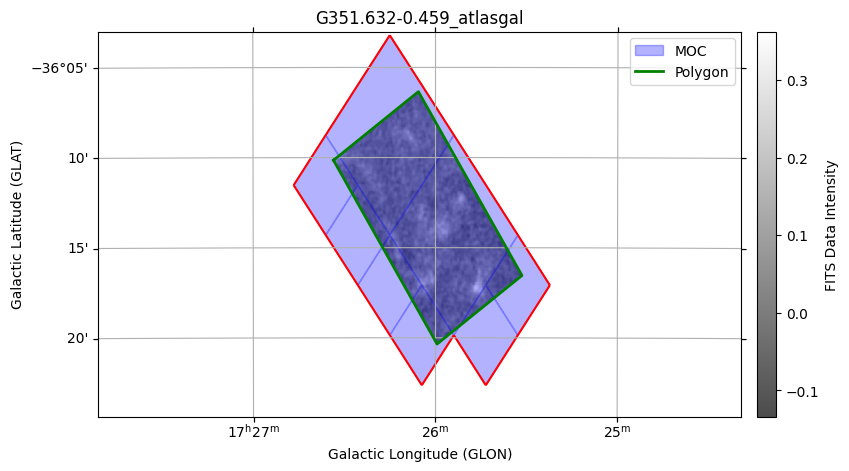

2024-11-28 14:45:12,051 - INFO - Plot saved: test_plots/G351.632-0.459_atlasgal.png
2024-11-28 14:45:12,065 - INFO - Calling _reproject_full in non-dask mode
2024-11-28 14:45:12,818 - INFO - Plot saved as SN1987A_cut_35_smHB.png


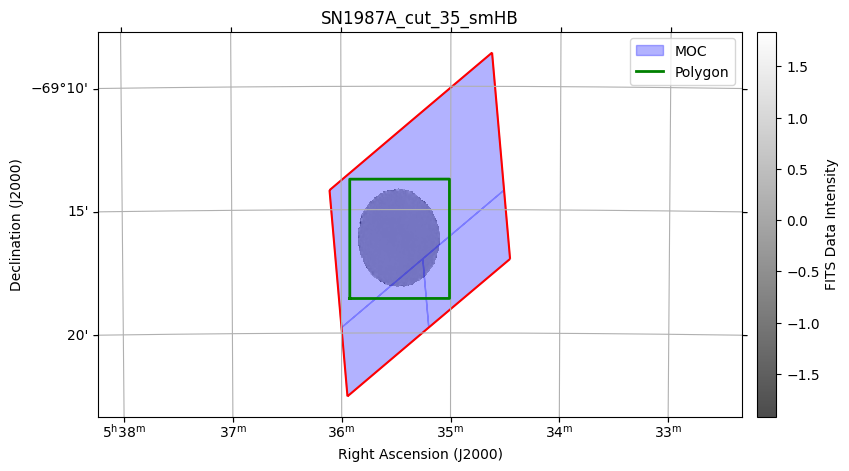

2024-11-28 14:45:12,915 - INFO - Plot saved: test_plots/SN1987A_cut_35_smHB.png
2024-11-28 14:45:12,930 - INFO - Calling _reproject_full in non-dask mode
2024-11-28 14:45:13,806 - INFO - Plot saved as G327.617-0.364_I4.png


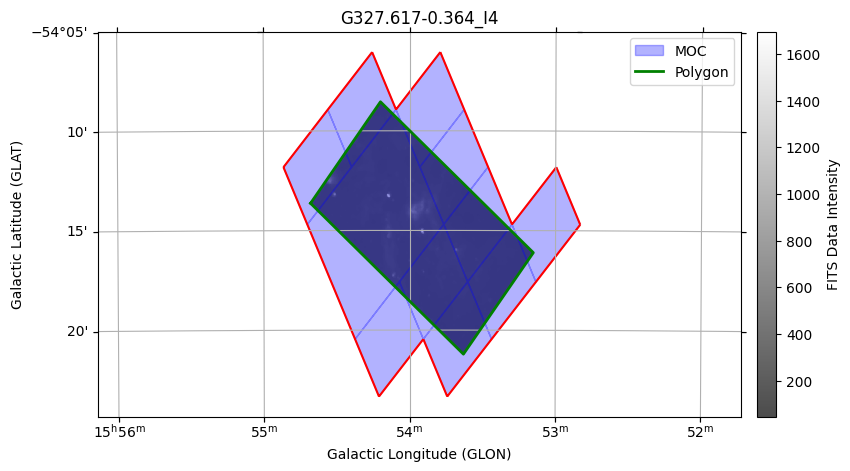

2024-11-28 14:45:13,910 - INFO - Plot saved: test_plots/G327.617-0.364_I4.png
2024-11-28 14:45:13,939 - INFO - Calling _reproject_full in non-dask mode
2024-11-28 14:45:14,704 - INFO - Plot saved as SNaverage5-0.png


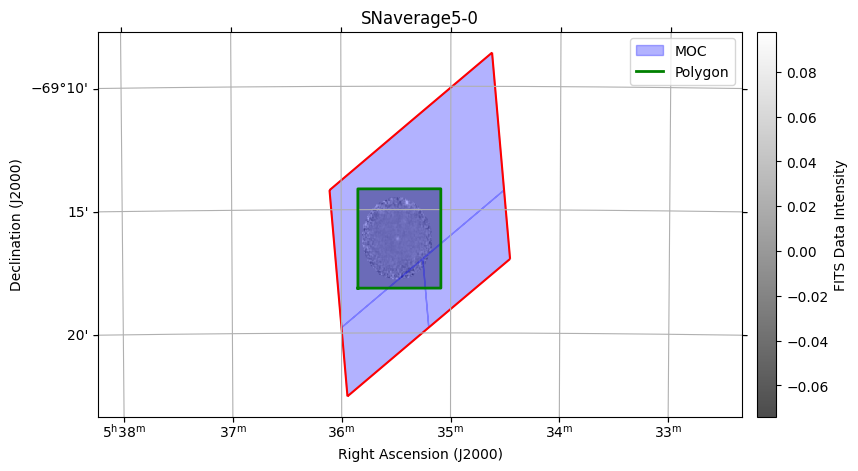

2024-11-28 14:45:14,802 - INFO - Plot saved: test_plots/SNaverage5-0.png
2024-11-28 14:45:14,814 - INFO - Calling _reproject_full in non-dask mode
2024-11-28 14:45:15,678 - INFO - Plot saved as G351.702+0.672_atlasgal.png


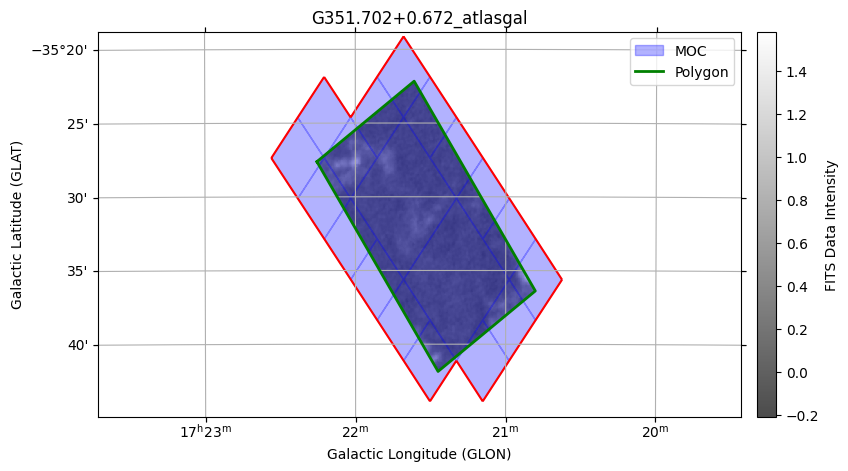

2024-11-28 14:45:15,784 - INFO - Plot saved: test_plots/G351.702+0.672_atlasgal.png
2024-11-28 14:45:15,803 - INFO - Calling _reproject_full in non-dask mode
2024-11-28 14:45:16,566 - INFO - Plot saved as UGC_09618_2MASS_H.png


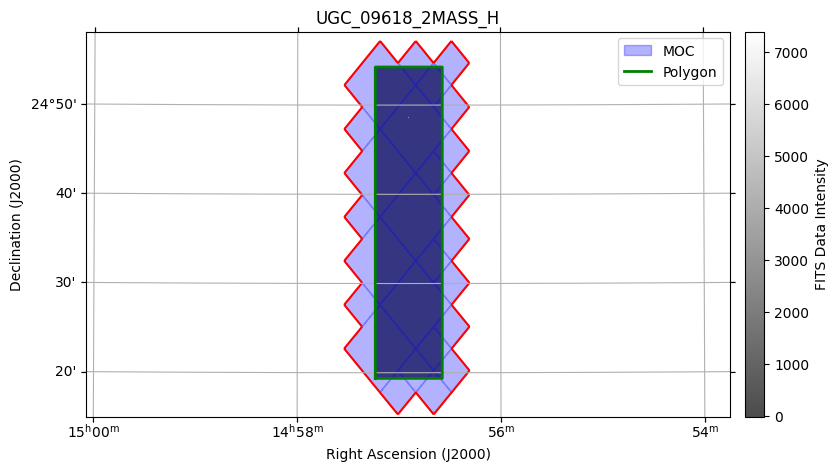

2024-11-28 14:45:16,663 - INFO - Plot saved: test_plots/UGC_09618_2MASS_H.png
2024-11-28 14:45:16,683 - INFO - Calling _reproject_full in non-dask mode
2024-11-28 14:45:17,468 - INFO - Plot saved as UGC_09618_S_2MASS_H.png


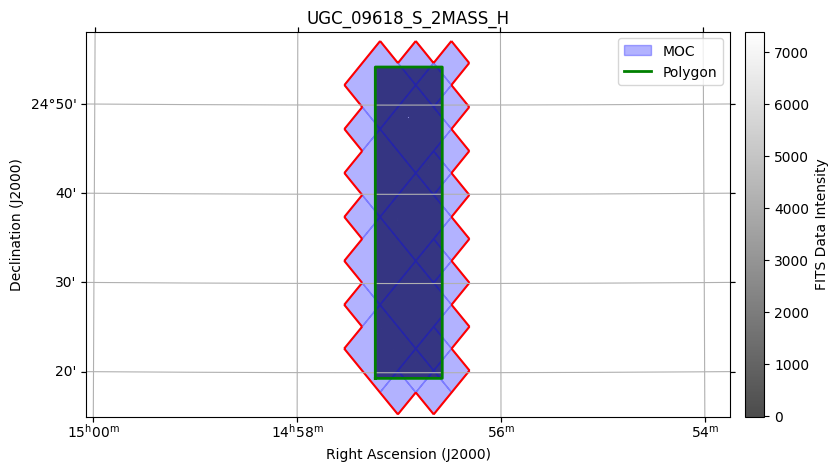

2024-11-28 14:45:17,567 - INFO - Plot saved: test_plots/UGC_09618_S_2MASS_H.png
2024-11-28 14:45:17,586 - INFO - Calling _reproject_full in non-dask mode
2024-11-28 14:45:17,587 - ERROR - Failed to reproject or plot FITS data: Number of dimensions in input and output WCS should match
2024-11-28 14:45:17,886 - INFO - Plot saved as 2013.1.01292.S_SB_X4eb_GB_X4ec_MB_X4ed_2-38011_sci.spw0_1_2_3.cont.I.image.png


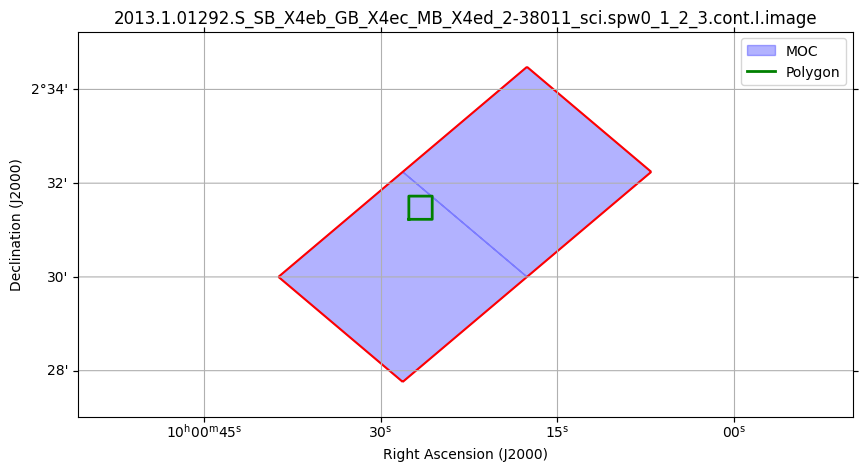

2024-11-28 14:45:17,970 - INFO - Plot saved: test_plots/2013.1.01292.S_SB_X4eb_GB_X4ec_MB_X4ed_2-38011_sci.spw0_1_2_3.cont.I.image.png
2024-11-28 14:45:18,040 - INFO - Calling _reproject_full in non-dask mode
2024-11-28 14:45:18,041 - ERROR - Failed to reproject or plot FITS data: Number of dimensions in input and output WCS should match
2024-11-28 14:45:18,337 - INFO - Plot saved as 5GHz_n_f.png


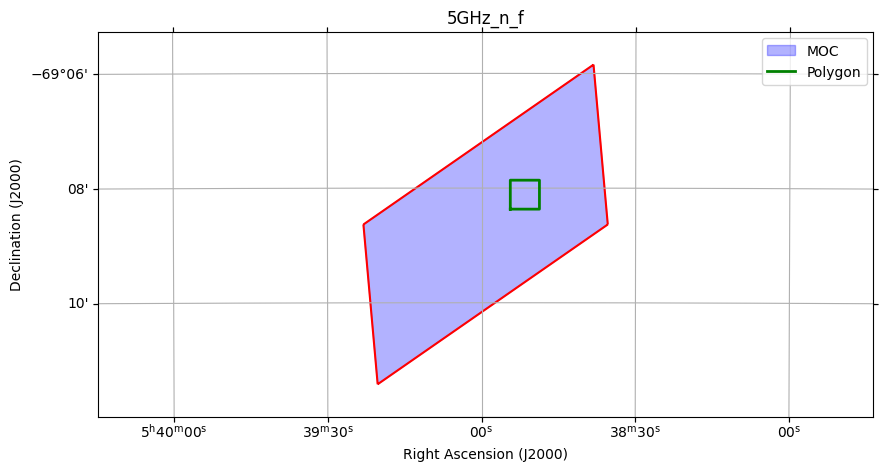

2024-11-28 14:45:18,418 - INFO - Plot saved: test_plots/5GHz_n_f.png
2024-11-28 14:45:18,447 - INFO - Calling _reproject_full in non-dask mode
2024-11-28 14:45:19,336 - INFO - Plot saved as N2.20100426.52760.png


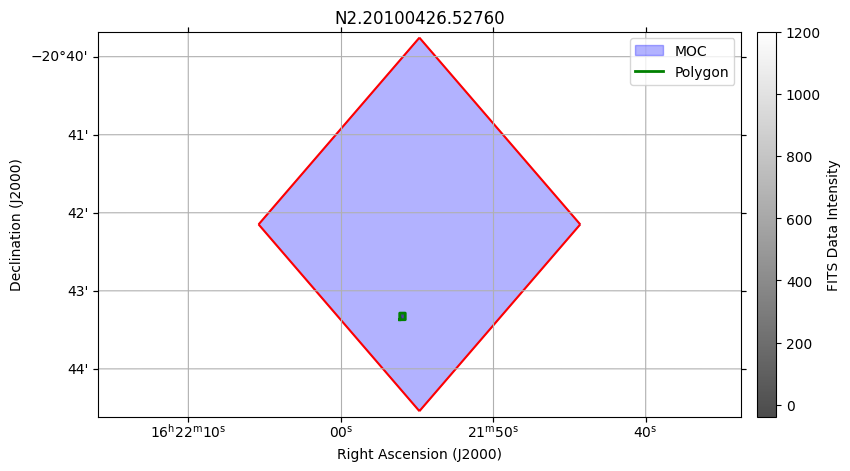

2024-11-28 14:45:19,437 - INFO - Plot saved: test_plots/N2.20100426.52760.png
2024-11-28 14:45:19,452 - INFO - Calling _reproject_full in non-dask mode
2024-11-28 14:45:20,296 - INFO - Plot saved as SN1987A_87_smHB.png


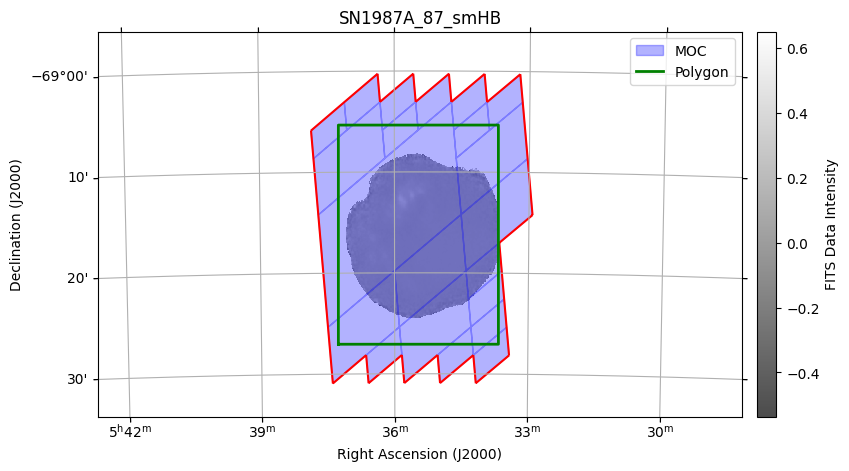

2024-11-28 14:45:20,402 - INFO - Plot saved: test_plots/SN1987A_87_smHB.png
2024-11-28 14:45:20,416 - INFO - Calling _reproject_full in non-dask mode
2024-11-28 14:45:21,278 - INFO - Plot saved as av_galcen_2mass.png


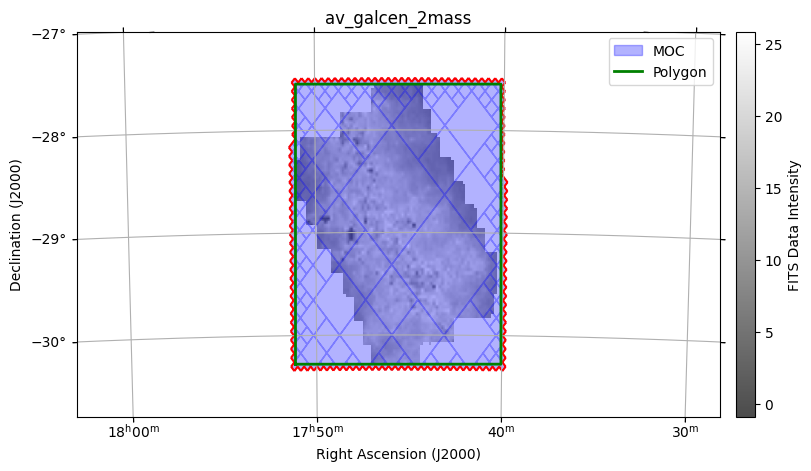

2024-11-28 14:45:21,382 - INFO - Plot saved: test_plots/av_galcen_2mass.png
2024-11-28 14:45:21,405 - INFO - Calling _reproject_full in non-dask mode
2024-11-28 14:45:22,158 - INFO - Plot saved as NGC_4486_MIPS_M1.png


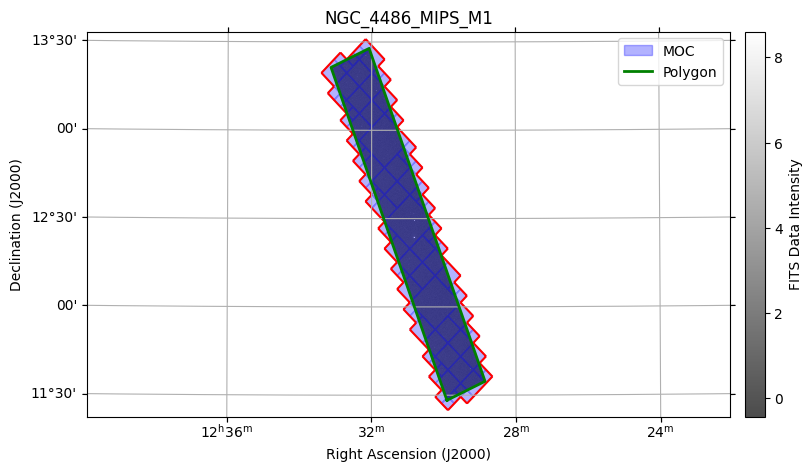

2024-11-28 14:45:22,255 - INFO - Plot saved: test_plots/NGC_4486_MIPS_M1.png
2024-11-28 14:45:22,286 - INFO - Calling _reproject_full in non-dask mode
2024-11-28 14:45:23,189 - INFO - Plot saved as id12_GAL-Survey-GC.fpsf.png


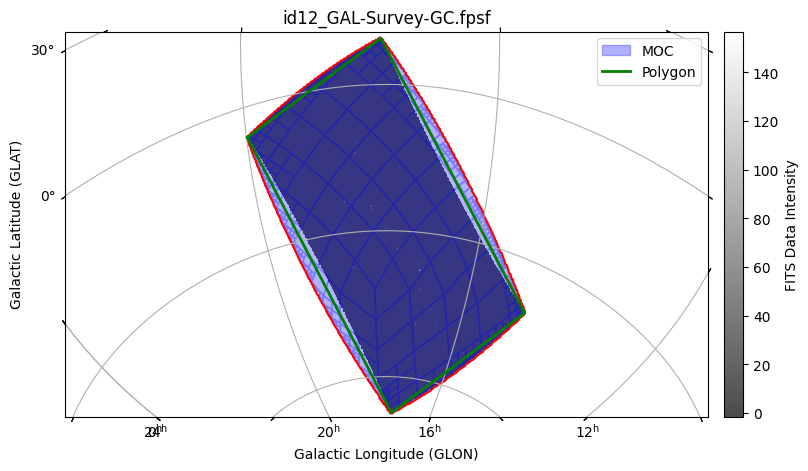

2024-11-28 14:45:23,303 - INFO - Plot saved: test_plots/id12_GAL-Survey-GC.fpsf.png
2024-11-28 14:45:23,324 - INFO - Calling _reproject_full in non-dask mode
2024-11-28 14:45:23,324 - ERROR - Failed to reproject or plot FITS data: Number of dimensions in input and output WCS should match
2024-11-28 14:45:23,622 - INFO - Plot saved as 2013.1.00034.S_SB_X5_GB_X6_MB_X7_midz_cell10_25342_sci.spw0_1_2_3.cont.I.image.png


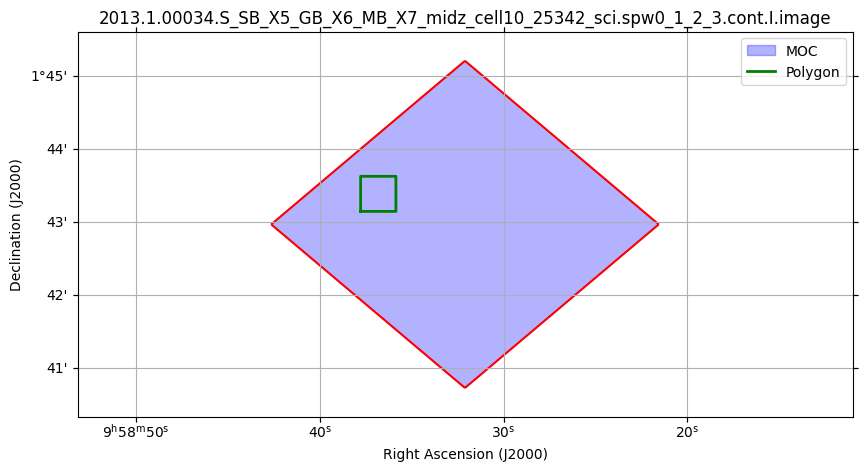

2024-11-28 14:45:23,703 - INFO - Plot saved: test_plots/2013.1.00034.S_SB_X5_GB_X6_MB_X7_midz_cell10_25342_sci.spw0_1_2_3.cont.I.image.png
2024-11-28 14:45:23,779 - INFO - Calling _reproject_full in non-dask mode
2024-11-28 14:45:24,652 - INFO - Plot saved as av_galcen_spitzer.png


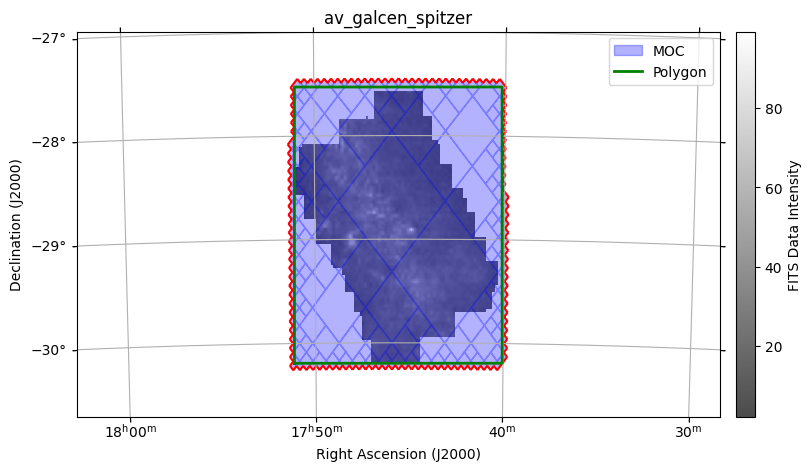

2024-11-28 14:45:24,764 - INFO - Plot saved: test_plots/av_galcen_spitzer.png
2024-11-28 14:45:24,792 - INFO - Calling _reproject_full in non-dask mode
2024-11-28 14:45:25,598 - INFO - Plot saved as imageih.png


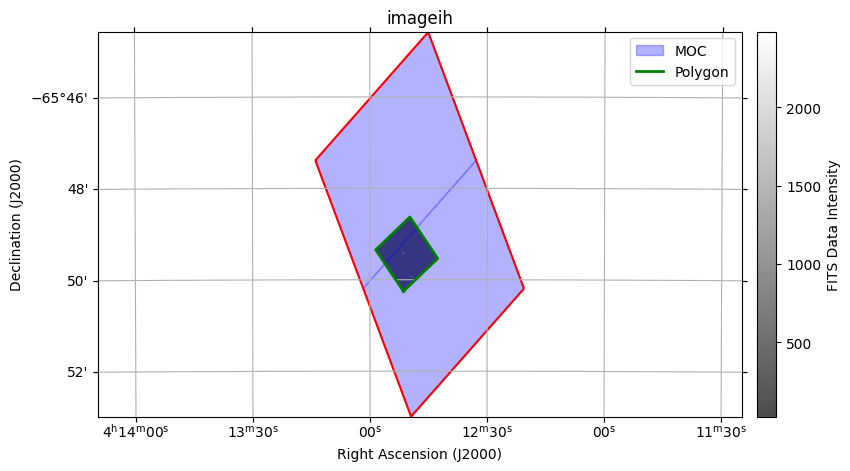

2024-11-28 14:45:25,708 - INFO - Plot saved: test_plots/imageih.png
2024-11-28 14:45:25,754 - INFO - Calling _reproject_full in non-dask mode
2024-11-28 14:45:26,616 - INFO - Plot saved as imagerf.png


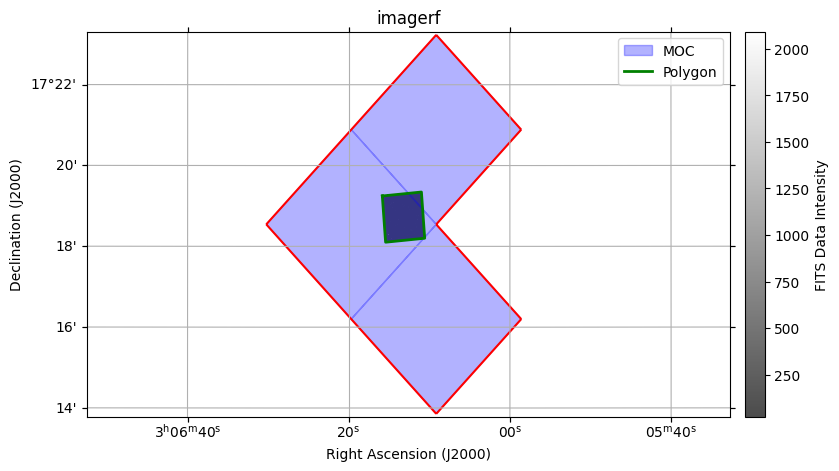

2024-11-28 14:45:26,732 - INFO - Plot saved: test_plots/imagerf.png
2024-11-28 14:45:26,732 - WARNING - Row 18: 'Polygon_Coords' is missing for 'whsky072.fit'. Skipping.
2024-11-28 14:45:26,733 - WARNING - Row 19: 'Polygon_Coords' is missing for 'u.fit'. Skipping.
2024-11-28 14:45:26,752 - INFO - Calling _reproject_full in non-dask mode
2024-11-28 14:45:26,753 - ERROR - Failed to reproject or plot FITS data: Number of dimensions in input and output WCS should match
2024-11-28 14:45:27,057 - INFO - Plot saved as G9_POLIN.png


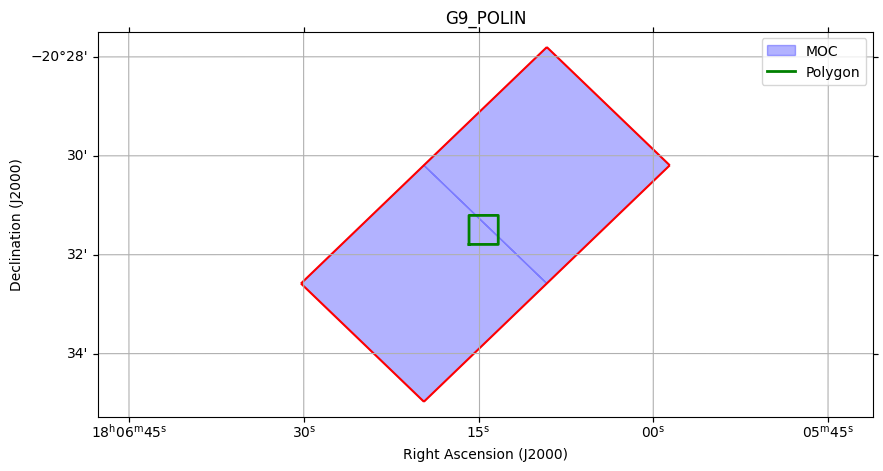

2024-11-28 14:45:27,144 - INFO - Plot saved: test_plots/G9_POLIN.png
2024-11-28 14:45:27,144 - INFO - Finished plotting MOCs and polygons.


In [8]:
# Test plotting using plot_moc_and_polygon_from_dataset_notebook
logger.info("Testing plotting of MOCs and polygons.")

try:
    plot_moc_and_polygon_from_dataset_notebook(
        metadata_df=metadata_loaded_df,
        input_dir=fits_directory,
        output_dir=plot_output_dir,
        max_plots=30, # Limit to 30 plots for testing
        plot_directly=True
    )
    logger.info("Finished plotting MOCs and polygons.")
except Exception as e:
    logger.error(f"Error occurred during plotting: {e}")



## 6. Searching FITS Files

### Search by Point

Define a point (RA, Dec) and search for FITS files that cover this point.

In [14]:
# Define a test point
test_point = {
    'ra': 270.0,  # Right Ascension in degrees
    'dec': -30   # Declination in degrees
}

logger.info(f"Testing search by point: RA={test_point['ra']}, Dec={test_point['dec']}")

# Perform the search
matching_fits_by_point = search_fits_by_point(metadata_loaded_df, test_point['ra'], test_point['dec'])

# Display results
if not matching_fits_by_point.empty:
    logger.info(f"FITS files containing the point (RA={test_point['ra']}, Dec={test_point['dec']}):")
    display(matching_fits_by_point[['FITS_File', 'Resolved_Object']])
else:
    logger.info("No FITS files found containing the specified point.")


2024-11-28 14:45:38,418 - INFO - Testing search by point: RA=270.0, Dec=-30
2024-11-28 14:45:38,429 - INFO - FITS files containing the point (RA=270.0, Dec=-30):


,FITS_File,Resolved_Object
13,id12_GAL-Survey-GC.fpsf.fits,Unknown


### Search by Circular Region

Define a circular region and search for FITS files intersecting this region.

In [15]:
# Define a test circular region
test_circle = {
    'type': 'circle',
    'center': (270.0, -29),  # Center RA and Dec in degrees
    'radius': 5          # Radius in degrees
}

logger.info(f"Testing search by circular region: Center RA={test_circle['center'][0]}, Dec={test_circle['center'][1]}, Radius={test_circle['radius']} degrees")

# Perform the search
matching_fits_by_circle = search_fits_by_region(metadata_loaded_df, test_circle)

# Display results
if not matching_fits_by_circle.empty:
    logger.info(f"FITS files intersecting the circular region (RA={test_circle['center'][0]}, Dec={test_circle['center'][1]}, Radius={test_circle['radius']} degrees):")
    display(matching_fits_by_circle[['FITS_File', 'Resolved_Object']])
else:
    logger.info("No FITS files found intersecting the specified circular region.")


2024-11-28 14:45:40,666 - INFO - Testing search by circular region: Center RA=270.0, Dec=-29, Radius=5 degrees
2024-11-28 14:45:40,677 - INFO - FITS files intersecting the circular region (RA=270.0, Dec=-29, Radius=5 degrees):


,FITS_File,Resolved_Object
11,av_galcen_2mass.fits,Unknown
13,id12_GAL-Survey-GC.fpsf.fits,Unknown
15,av_galcen_spitzer.fits,Unknown


### Search by Polygonal Region

Define a polygonal region and search for FITS files intersecting this region.

In [17]:
# Define a test polygonal region
test_polygon = {
    'type': 'polygon',
    'coordinates': [
    (180, -60),  # Bottom-Left Corner
    (180, 60),   # Top-Left Corner
    (280, 60),   # Top-Right Corner
    (280, -60)   # Bottom-Right Corner
    ]
}

logger.info(f"Testing search by polygonal region with coordinates: {test_polygon['coordinates']}")

# Perform the search
matching_fits_by_polygon = search_fits_by_region(metadata_loaded_df, test_polygon)

# Display results
if not matching_fits_by_polygon.empty:
    logger.info("FITS files intersecting the polygonal region:")
    display(matching_fits_by_polygon[['FITS_File', 'Resolved_Object']])
else:
    logger.info("No FITS files found intersecting the specified polygonal region.")


2024-11-28 14:45:46,083 - INFO - Testing search by polygonal region with coordinates: [(180, -60), (180, 60), (280, 60), (280, -60)]
2024-11-28 14:45:46,095 - INFO - FITS files intersecting the polygonal region:


,FITS_File,Resolved_Object
0,G351.632-0.459_atlasgal.fits,G351.632-0.459
2,G327.617-0.364_I4.fits,G327.617-0.364
4,G351.702+0.672_atlasgal.fits,Unknown
5,UGC_09618_2MASS_H.fits,Unknown
6,UGC_09618_S_2MASS_H.fits,Unknown
9,N2.20100426.52760.fits,Unknown
11,av_galcen_2mass.fits,Unknown
12,NGC_4486_MIPS_M1.fits,Unknown
13,id12_GAL-Survey-GC.fpsf.fits,Unknown
15,av_galcen_spitzer.fits,Unknown


## 7. Plotting Search Results

Visualize the search region and the FITS files that intersect with it.

**Note:** The plots will be saved in the `search_plots` directory as `search_region_and_fits.png`.

### Plotting with a Circular Region

2024-11-28 14:45:48,496 - INFO - Plots will be saved to: search_plots
2024-11-28 14:45:48,509 - INFO - Generating plots for 10 matching FITS files.
Plotting FITS Coverages: 100%|██████████| 10/10 [00:00<00:00, 258.52it/s]


3 [-0.43563772  0.54099517]
4 [ 0.98649553 -0.10100561]


2024-11-28 14:45:49,816 - INFO - Search region and matching FITS coverages plotted and saved to 'search_plots/search_region_and_fits.png'


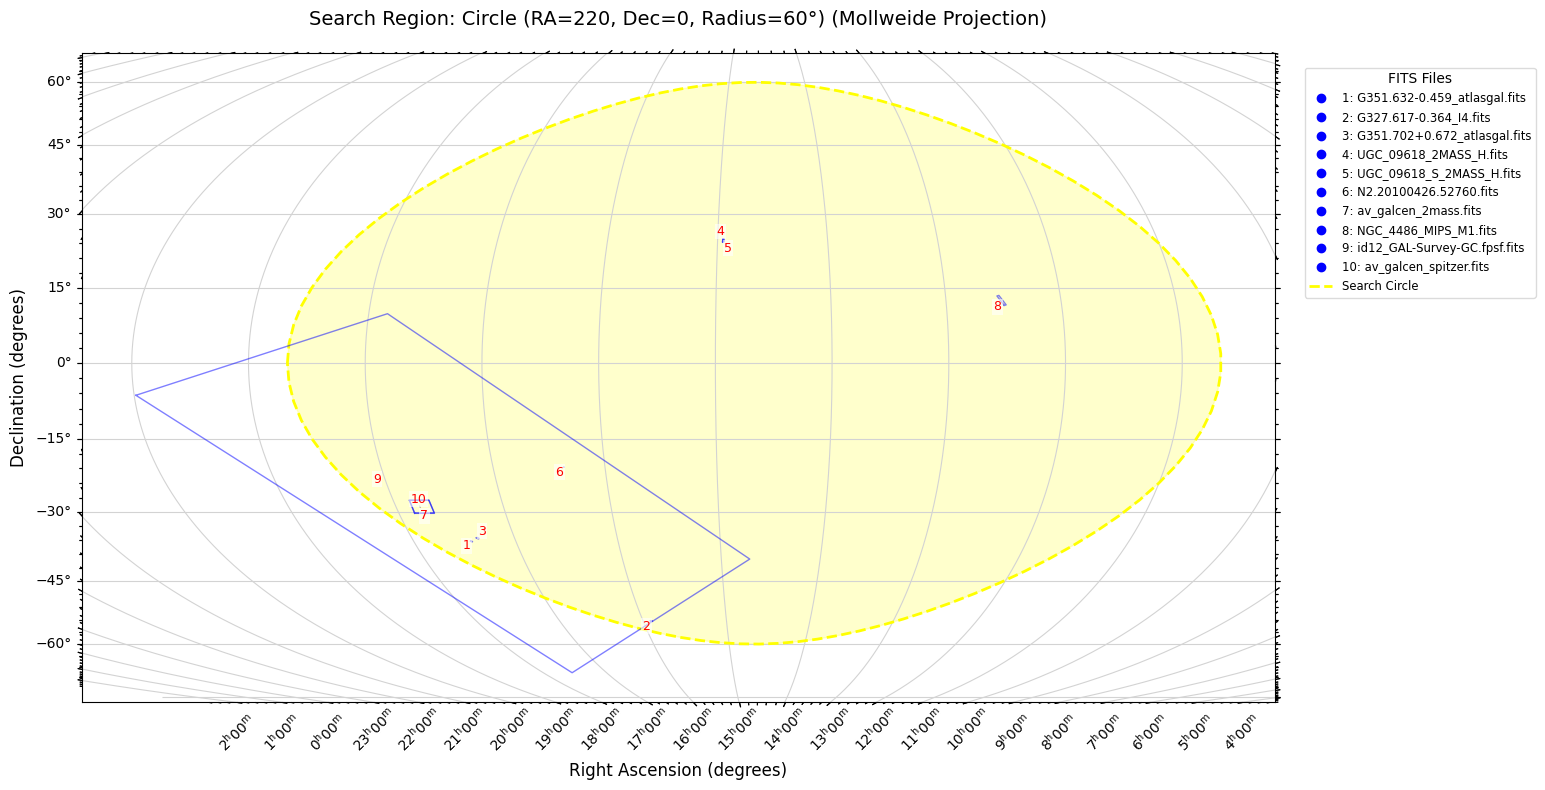

In [18]:
# Define a search region (e.g., a circle)
search_region = {
    'type': 'circle',
    'center': (220, 0),  
    'radius' : 60         
}

# Call the plotting function
plot_search_region_and_find_fits(
    metadata_df=metadata_df,
    region=search_region,
    input_dir='fits_collection',
    output_dir='search_plots',
    max_plots=10,
    plot_search_region=True
)

### Plotting with a Polygonal Region

2024-11-28 14:45:54,137 - INFO - Plots will be saved to: search_plots
2024-11-28 14:45:54,147 - INFO - Generating plots for 10 matching FITS files.
2024-11-28 14:45:54,158 - INFO - Closed the search polygon by appending the first point.
Plotting FITS Coverages: 100%|██████████| 10/10 [00:00<00:00, 270.06it/s]


3 [-0.99526542 -0.53610415]
4 [0.32803038 0.71262181]


2024-11-28 14:45:55,355 - INFO - Search region and matching FITS coverages plotted and saved to 'search_plots/search_region_and_fits.png'


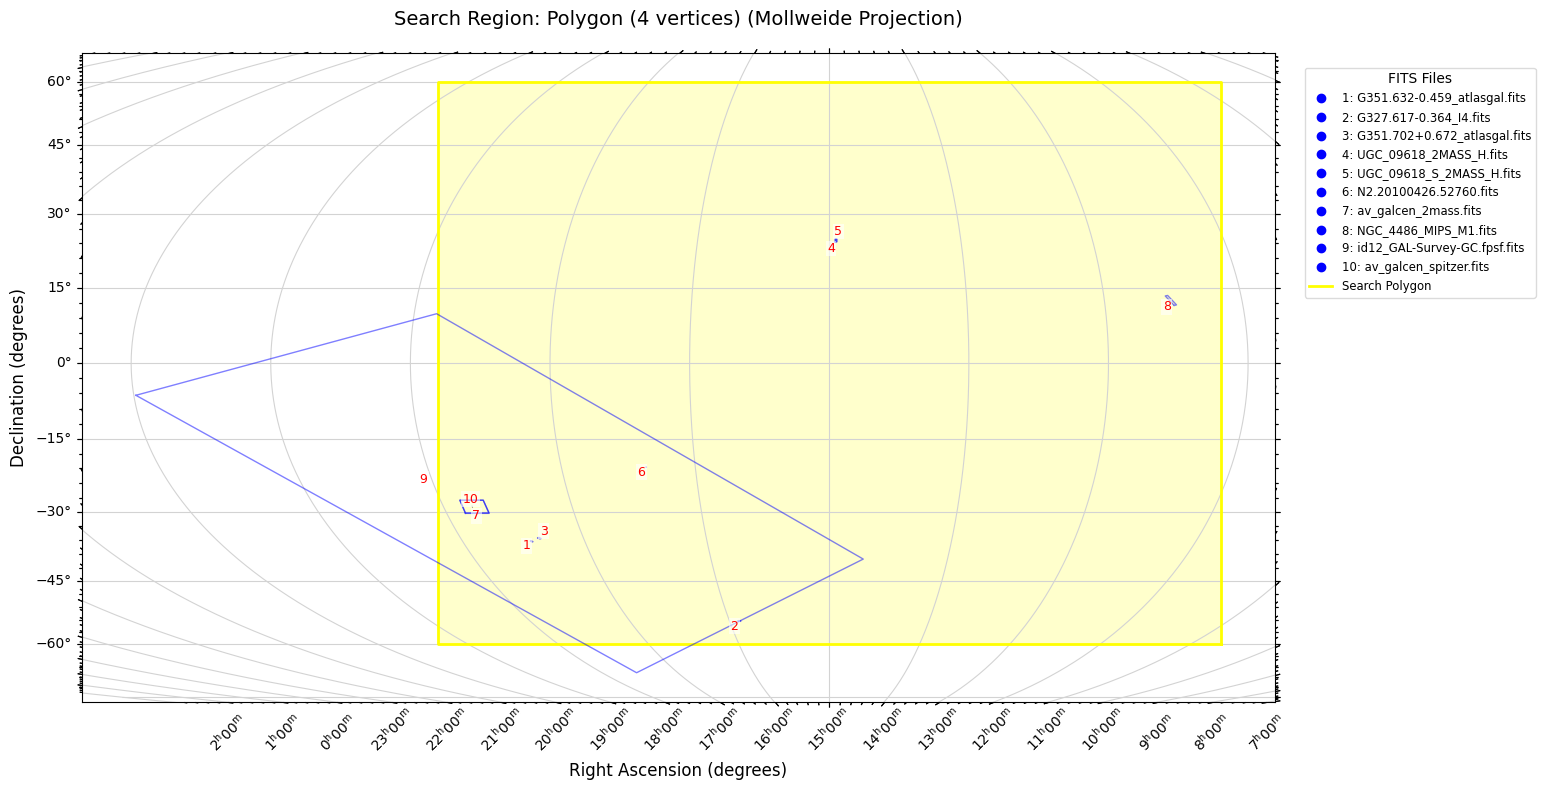

In [19]:
test_polygon = {
    'type': 'polygon',
    'coordinates': [
    (160, -60),  # Bottom-Left Corner
    (160, 60),   # Top-Left Corner
    (290, 60),   # Top-Right Corner
    (290, -60)   # Bottom-Right Corner
    ]
}

# Call the plotting function
plot_search_region_and_find_fits(
    metadata_df=metadata_df,
    region=test_polygon,
    input_dir='fits_collection',
    output_dir='search_plots',
    max_plots=10,
    plot_search_region=True
)

## 8. Conclusion

In this notebook, we've demonstrated how to use the `fits_metadata_extractor` package to:

- Process FITS files and extract metadata.
- Save and load metadata.
- Visualize FITS file coverages using MOCs and polygons.
- Perform spatial searches to find FITS files covering specific regions.
- Visualize search results.

This package streamlines the workflow of handling FITS files and can be integrated into larger data analysis pipelines.

---

**Additional Notes:**

- Ensure that the `fits_metadata_extractor` package is installed in your environment.
- Replace placeholder paths and parameters with actual values relevant to your data.
- If you encounter any issues, check the logs for error messages.

---